In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

In [3]:
print(X[:10])

[[-0.2137706   0.93755527]
 [ 0.16197304  0.84227686]
 [-0.11555988 -0.76289404]
 [-0.82867748 -0.54382654]
 [ 0.98357263 -0.36683461]
 [ 0.30537361 -0.61958277]
 [ 0.94345031  0.35411144]
 [-0.46773675 -0.58136314]
 [ 0.83922992 -0.37472502]
 [ 0.97673337  0.10993552]]


In [4]:
print(y[:10])

[-1, 1, 1, -1, -1, 1, -1, 1, -1, -1]


In [5]:
Xcopy = np.copy(X)

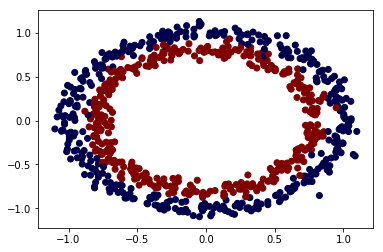

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10131531)
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap='seismic')
plt.show()

In [7]:
# Linear Classification Implementation

In [8]:
# Ref: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
# https://machinelearningmastery.com/solve-linear-regression-using-linear-algebra/
# https://github.com/marcopeix/ISL-linear-regression/blob/master/Linear%20Regression.ipynb

def decision_boundary_lin(weights, x_min, x_max):
   # Return two points on the decision boundary
   return [point_on_boundary_lin(weights, x_min), point_on_boundary_lin(weights, x_max)]

def point_on_boundary_lin(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [17]:
def linear_regression(X, y):
    X_inverse = np.linalg.pinv(X)
    w_lin = np.matmul(X_inverse, y)
    
    return w_lin

def calc_square_error(a, b):
    e_sq = 0
    for i in range(len(a)):
        e_sq += math.pow((a[i] - b[i]), 2)
    
    return math.sqrt(e_sq / len(a))

def calculate_and_plot_linear_regression(X, y):
    
    # Insert bias
    X = np.insert(X, 0, 1, axis=1)

    # shuffle data
    X, y = shuffle(X, y, random_state=0)

    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10131531)

    # Linear regression
    weights = linear_regression(X_train, y_train)
    
    # Plot test data
    plt.scatter(X[:,1], X[:,2], c=y)

    # Plot
    minx = np.amin(X)
    maxx = np.amax(X)
    miny, maxy = decision_boundary_lin(weights, minx, maxx)
    plt.plot([minx, maxx], [miny, maxy], 'bx-')
    
    # yhat
    yhat = X_test.dot(weights)
    plt.scatter(X_test[:,1], np.sign(yhat)*2, c=y_test)
    
    # error
    error = calc_square_error(y_test,  yhat)
    
    plt.plot([0], [0], marker='x', markersize=30, color="green")
    
    return weights, yhat, error

Resulting Error: 1.002885402373941


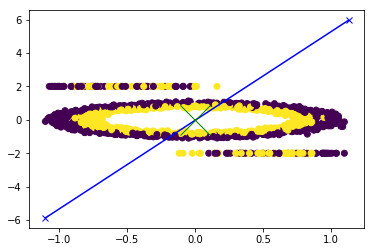

In [18]:
X = np.copy(Xcopy)

weights, yhat, error = calculate_and_plot_linear_regression(X, y)
print("Resulting Error: %s" % error)

Linear regression boundary line passing through the origin of our dataset. This gives us a high error rate.

In [19]:
# Choosing new features and trying those for a better fit.

Resulting Error: 0.4082581738554237


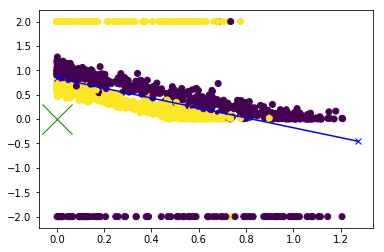

In [20]:
# Trying a square approach
X = np.copy(Xcopy)
X = np.square(X)

weights, yhat, error = calculate_and_plot_linear_regression(X, y)
print("Resulting Error: %s" % error)

A squared approach appears to give a good result. The data appears to eblinearly seperable. 

Resulting Error: 1.0032057109736134


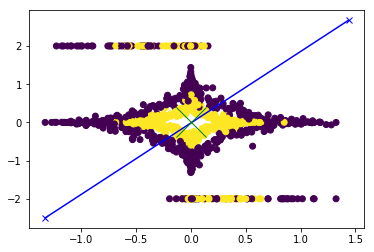

In [21]:
# Trying a cubed approach
X = np.copy(Xcopy)
X = np.power(X, 3)

weights, yhat, error = calculate_and_plot_linear_regression(X, y)
print("Resulting Error: %s" % error)

A cubed approach appears to give results similar to the original. So that result is not that much of an improvement. It goes through the origin resulting in a not very applicable model.

Resulting Error: 0.6176208317934339


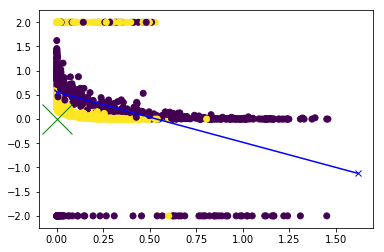

In [22]:
# Trying a 4th power approach
X = np.copy(Xcopy)
X = np.power(X, 4)

weights, yhat, error = calculate_and_plot_linear_regression(X, y)
print("Resulting Error: %s" % error)

The error rate for a 4th power approach is higher than the squared one but gives a very different visualisation. 

/Users/cathalc/.pyenv/versions/3.5.6/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


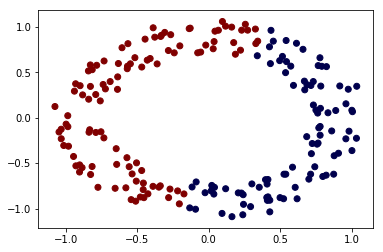

0.46


In [23]:
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plt.scatter(X_test[:,0],X_test[:,1], c=y_pred, cmap='seismic')
plt.show()

print(accuracy_score(y_pred, y_test))

It appears using the built in regression gives us a similar result to the one when we tried a squared approach. So our approaches were similar in result to built in libraries.